#**Ejercicio semana 6 - Características en imágenes**

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

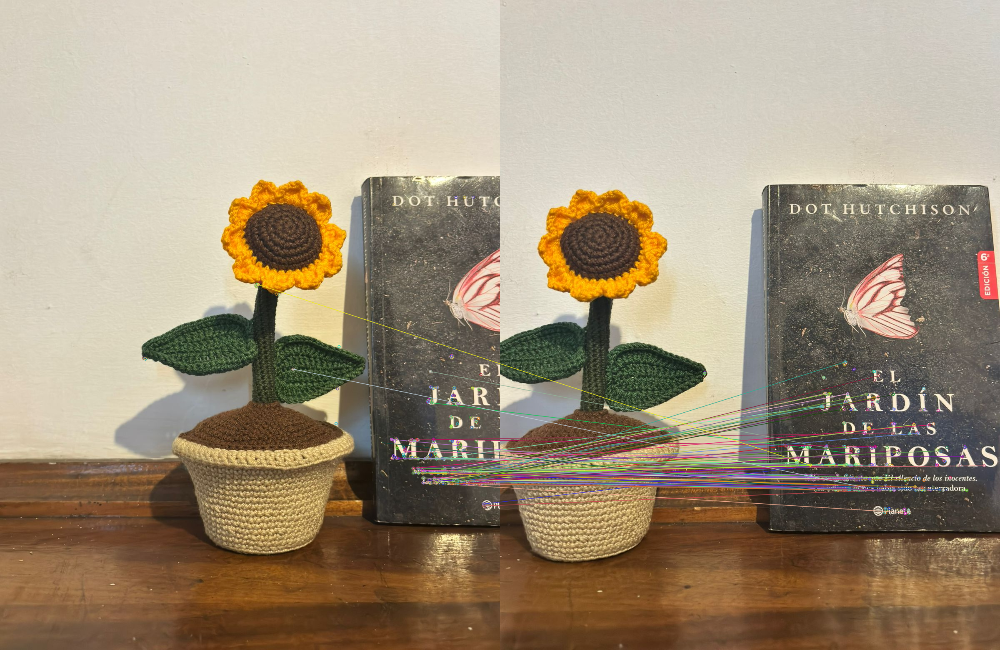

-1

In [ ]:
# Read the query image as query_img
# and train image This query image
# is what you need to find in train image
# Save it in the same directory
# with the name image.jpg
query_img = cv2.imread('/content/drive/MyDrive/DECIMO SEMESTRE/VISION POR COMPUTADOR /1.jpg')
train_img = cv2.imread('/content/drive/MyDrive/DECIMO SEMESTRE/VISION POR COMPUTADOR /2.jpg')

# Convert it to grayscale
query_img_bw = cv2.cvtColor(query_img,cv2.COLOR_BGR2GRAY)
train_img_bw = cv2.cvtColor(train_img, cv2.COLOR_BGR2GRAY)

# Initialize the ORB detector algorithm
orb = cv2.ORB_create()

# Now detect the keypoints and compute
# the descriptors for the query image
# and train image
queryKeypoints, queryDescriptors = orb.detectAndCompute(query_img_bw,None)
trainKeypoints, trainDescriptors = orb.detectAndCompute(train_img_bw,None)

# Initialize the Matcher for matching
# the keypoints and then match the
# keypoints
matcher = cv2.BFMatcher()
matches = matcher.match(queryDescriptors,trainDescriptors)

# draw the matches to the final image
# containing both the images the drawMatches()
# function takes both images and keypoints
# and outputs the matched query image with
# its train image
final_img = cv2.drawMatches(query_img, queryKeypoints,
train_img, trainKeypoints, matches[:100],None)

final_img = cv2.resize(final_img, (1000,650))

# Show the final image
cv2_imshow(final_img)
cv2.waitKey(3000)


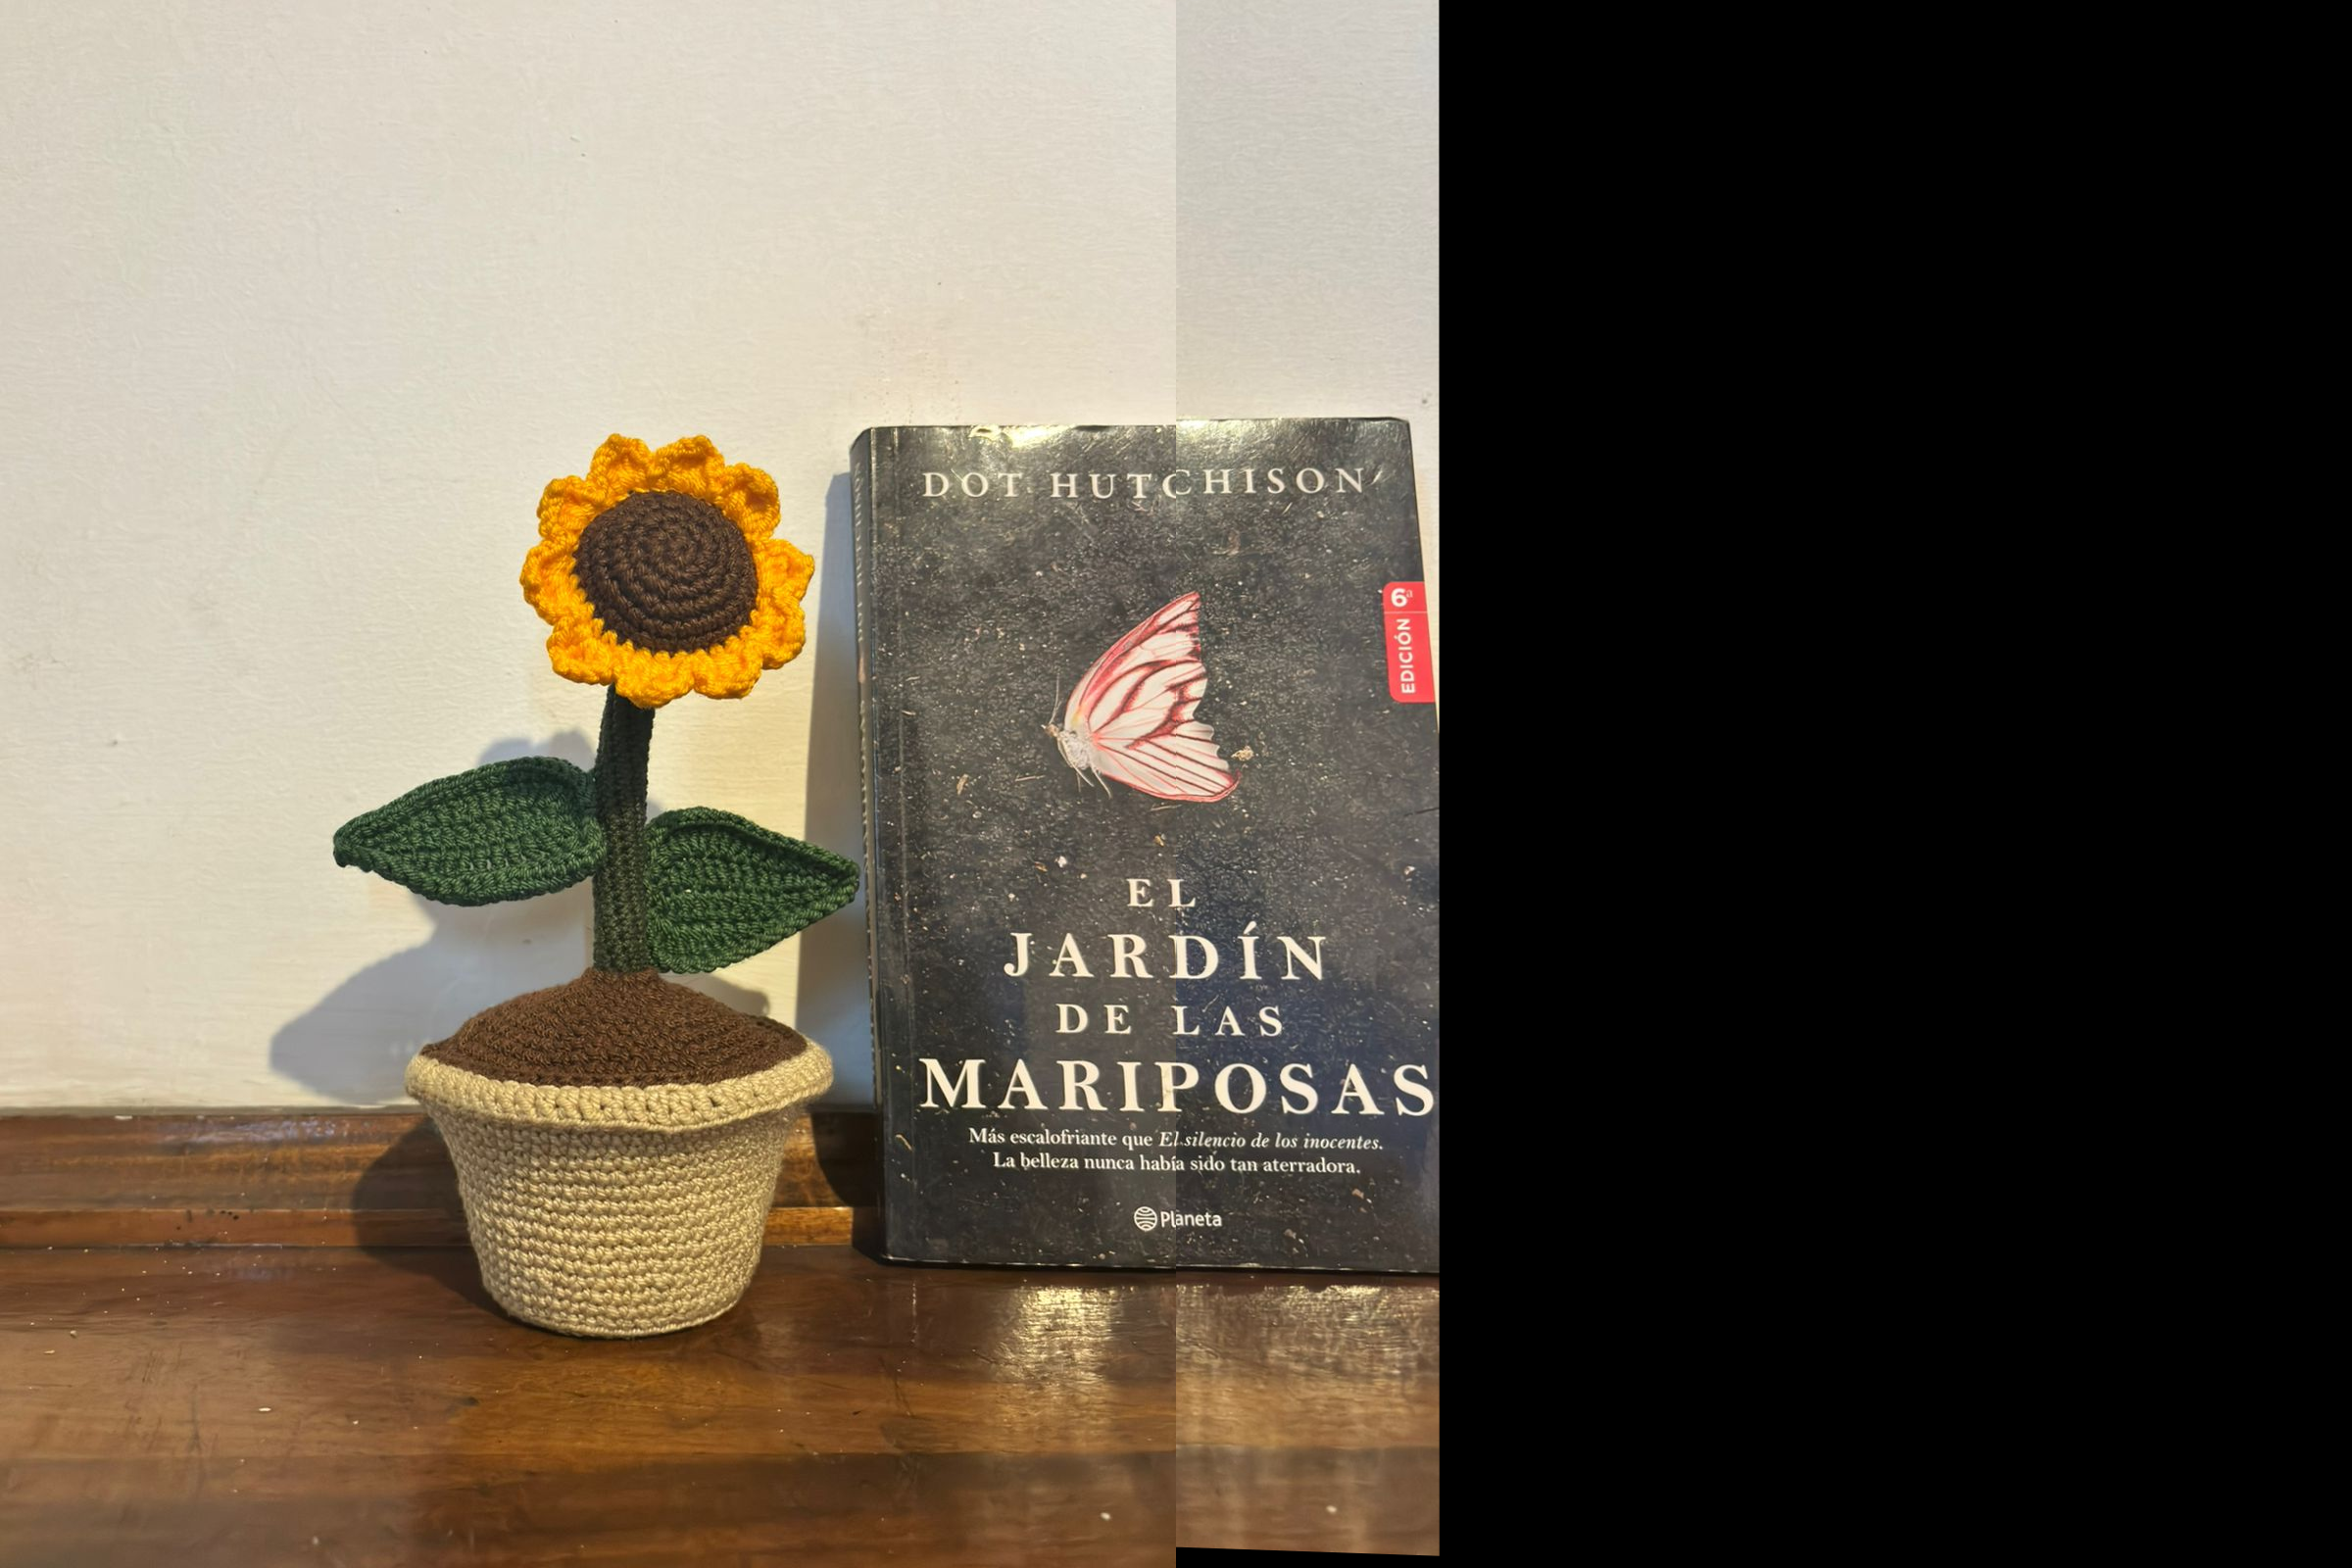

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def create_panorama(img1, img2):
    # Inicializar el detector ORB
    orb = cv2.ORB_create()

    # Encontrar los puntos clave y sus descriptores para ambas imágenes
    keypoints1, descriptors1 = orb.detectAndCompute(img1, None)
    keypoints2, descriptors2 = orb.detectAndCompute(img2, None)

    # Inicializar el objeto de coincidencia de fuerza bruta
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    # Realizar la coincidencia de los descriptores
    matches = bf.match(descriptors1, descriptors2)

    # Ordenar las coincidencias por distancia
    matches = sorted(matches, key=lambda x: x.distance)

    # Elegir solo las mejores coincidencias
    good_matches = matches[:100]  # Puedes ajustar este número según tus necesidades

    # Dibujar los emparejamientos en una nueva imagen
    matching_result = cv2.drawMatches(img1, keypoints1, img2, keypoints2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Convertir los puntos clave en formato numpy array
    src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

    # Calcular la matriz de homografía
    H, _ = cv2.findHomography(dst_pts, src_pts, cv2.RANSAC, 5.0)

    # Deformar la segunda imagen para alinearla con la primera
    img2_aligned = cv2.warpPerspective(img2, H, (img1.shape[1] + img2.shape[1], img1.shape[0]))

    # Superponer las imágenes
    img2_aligned[0:img1.shape[0], 0:img1.shape[1]] = img1

    return img2_aligned, matching_result

# Cargar las imágenes
img1 = cv2.imread('/content/drive/MyDrive/DECIMO SEMESTRE/VISION POR COMPUTADOR /1.jpg')
img2 = cv2.imread('/content/drive/MyDrive/DECIMO SEMESTRE/VISION POR COMPUTADOR /2.jpg')

# Crear la foto panorámica y obtener los emparejamientos dibujados
panorama, matching_result = create_panorama(img1, img2)

# Mostrar la foto panorámica y los emparejamientos
cv2_imshow(panorama)
